# Importing Necessary Modules

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', None)

from scipy.stats import skew
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing Dataset 

In [353]:
data = pd.read_csv('smart_grid.csv')
data.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable


In [354]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [355]:
data.shape

(60000, 14)

In [356]:
data['stbf'] = data['stabf'].map({'unstable':0, "stable":1})

# Plotting the Distribution Curve

<AxesSubplot:xlabel='tau1', ylabel='Density'>

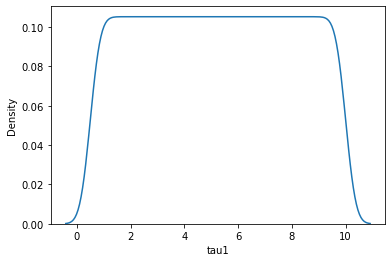

In [357]:
sns.distplot(data.tau1, hist=False)

<AxesSubplot:xlabel='tau2', ylabel='Density'>

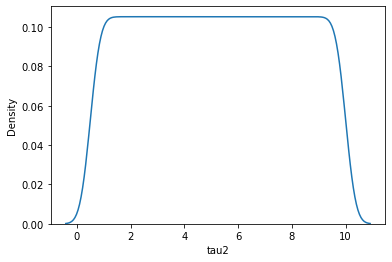

In [358]:
sns.distplot(data.tau2, hist=False)

<AxesSubplot:xlabel='tau3', ylabel='Density'>

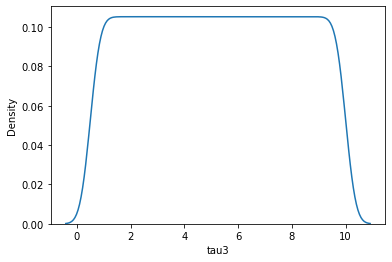

In [359]:
sns.distplot(data.tau3, hist=False)

<AxesSubplot:xlabel='tau4', ylabel='Density'>

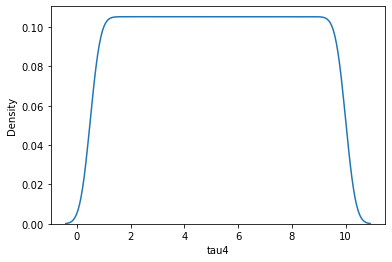

In [360]:
sns.distplot(data.tau4, hist=False)

<AxesSubplot:xlabel='p1', ylabel='Density'>

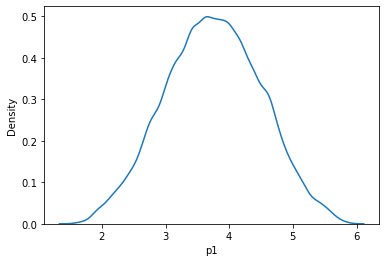

In [361]:
sns.distplot(data.p1, hist=False)

<AxesSubplot:xlabel='p2', ylabel='Density'>

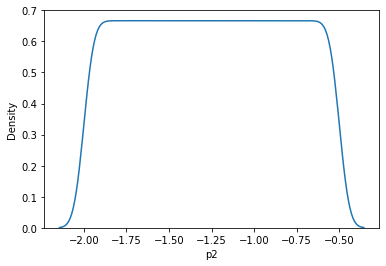

In [362]:
sns.distplot(data.p2, hist=False)

<AxesSubplot:xlabel='p3', ylabel='Density'>

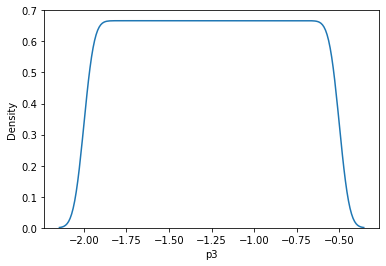

In [363]:
sns.distplot(data.p3, hist=False)

<AxesSubplot:xlabel='p4', ylabel='Density'>

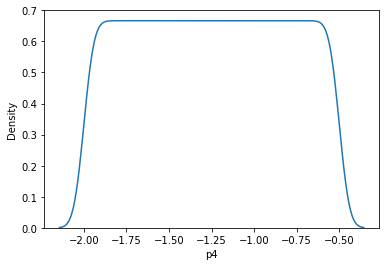

In [364]:
sns.distplot(data.p4, hist=False)

<AxesSubplot:xlabel='g1', ylabel='Density'>

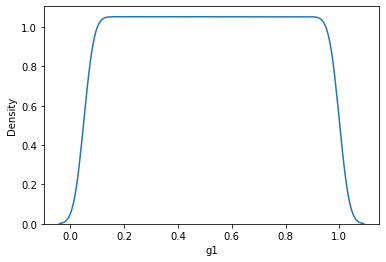

In [365]:
sns.distplot(data.g1, hist=False)

<AxesSubplot:xlabel='g2', ylabel='Density'>

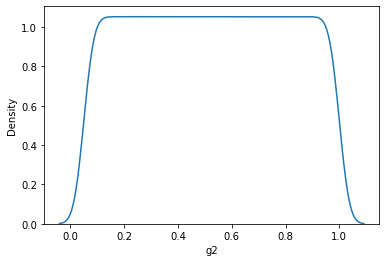

In [366]:
sns.distplot(data.g2, hist=False)

<AxesSubplot:xlabel='g3', ylabel='Density'>

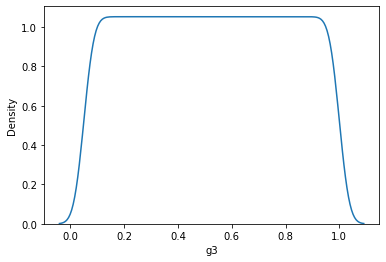

In [367]:
sns.distplot(data.g3, hist=False)

<AxesSubplot:xlabel='g4', ylabel='Density'>

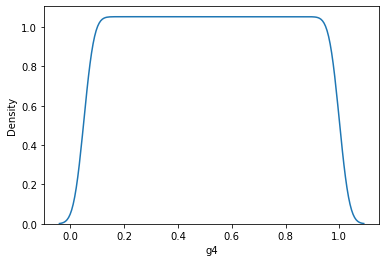

In [368]:
sns.distplot(data.g4, hist=False)

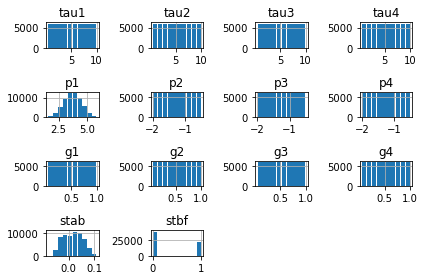

In [369]:
data.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

# Checking For Skewness

In [370]:
data.tau1.skew()

-5.410967977291829e-06

In [371]:
data.tau2.skew()

-1.1560977256334813e-06

In [372]:
data.tau3.skew()

-1.1560977256348132e-06

In [373]:
data.tau4.skew()

-1.1560977236912254e-06

In [374]:
data.p1.skew()

-0.012688423269881647

In [375]:
data.p2.skew()

3.1732550575027616e-06

In [376]:
data.p3.skew()

3.173255059041437e-06

In [377]:
data.p4.skew()

3.1732550574977476e-06

In [378]:
data.g1.skew()

2.9560882016307425e-06

In [379]:
data.g2.skew()

2.1535977770757543e-06

In [380]:
data.g3.skew()

2.153597778290157e-06

In [381]:
data.g4.skew()

2.153597779501688e-06

The value for each attribute is extremely low, almost tends to zero. Also visually inspecting the distribution curve, we can see that there are almost no outliers present. Thus we can directly jump into splitting the data into training and testing.

In the given dataset we have two predict cols, namely "stab" and "stabf". 

1. stab - It will be used for regression problem
2. stabf - It will be used for classification problem

# Splitting the data into X and Y

In [382]:
real_x = data.iloc[:,0:12].values

In [383]:
real_y_reg = data.iloc[:,12].values

In [384]:
real_y_class = data.iloc[:,-1].values

In [385]:
scaler=StandardScaler()
real_x=scaler.fit_transform(real_x)

# REGRESSION

LINEAR REGRESSION

In [386]:
x_train, x_test, y_train, y_test = train_test_split(real_x, real_y_reg, test_size=0.25, random_state=0, stratify=real_y_reg)

In [387]:
from sklearn.linear_model import LinearRegression

In [388]:
linear = LinearRegression()

In [389]:
linear.fit(x_train, y_train)

LinearRegression()

In [390]:
y_pred_linear = linear.predict(x_test)

In [391]:
r2_linear = r2_score(y_test, y_pred_linear)
r2_linear

0.6476719958949567

XGBoost Regressor

In [392]:
from xgboost import XGBRegressor

In [393]:
reg = XGBRegressor()

In [394]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [395]:
reg.score(x_test, y_test)

0.9609239821156487

Decision Tree Regression

In [396]:
from sklearn.tree import DecisionTreeRegressor

In [397]:
dtr = DecisionTreeRegressor()

In [398]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [399]:
y_pred_dtr = dtr.predict(x_test)

In [400]:
dtr.score(x_test, y_test)

0.836916408389136

Random Forest Regression

In [401]:
from sklearn.ensemble import RandomForestRegressor

In [402]:
rfr = RandomForestRegressor(random_state=0)

In [403]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [404]:
y_pred_rfr = rfr.predict(x_test)

In [405]:
rfr.score(x_test, y_test)

0.9413151679669954

# Classification

KNN

In [406]:
x_train, x_test, y_train, y_test = train_test_split(real_x, real_y_class, test_size=0.25, random_state=0, stratify=real_y_class)

In [407]:
from sklearn.neighbors import KNeighborsClassifier

In [408]:
knn = KNeighborsClassifier()

In [409]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [410]:
y_pred_knn = knn.predict(x_test)

In [411]:
knn.score(x_test, y_test)

0.8872666666666666

In [412]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[9007,  563],
       [1128, 4302]])

In [413]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      9570
           1       0.88      0.79      0.84      5430

    accuracy                           0.89     15000
   macro avg       0.89      0.87      0.87     15000
weighted avg       0.89      0.89      0.89     15000



Logistic Regression

In [414]:
from sklearn.linear_model import LogisticRegression

In [415]:
log = LogisticRegression()

In [416]:
log.fit(x_train, y_train)

LogisticRegression()

In [417]:
y_pred_log = log.predict(x_test)

In [418]:
log.score(x_test, y_test)

0.8137333333333333

In [419]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log

array([[8410, 1160],
       [1634, 3796]])

In [420]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      9570
           1       0.77      0.70      0.73      5430

    accuracy                           0.81     15000
   macro avg       0.80      0.79      0.79     15000
weighted avg       0.81      0.81      0.81     15000



Support Vector Machine

In [421]:
from sklearn.svm import SVC

In [422]:
svc = SVC(kernel='rbf', probability=True)

In [423]:
svc.fit(x_train, y_train)

SVC(probability=True)

In [424]:
y_pred_svc = svc.predict(x_test)

In [425]:
svc.score(x_test, y_test)

0.9766

In [426]:
cm_log = confusion_matrix(y_test, y_pred_svc)
cm_log

array([[9426,  144],
       [ 207, 5223]])

In [427]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9570
           1       0.97      0.96      0.97      5430

    accuracy                           0.98     15000
   macro avg       0.98      0.97      0.97     15000
weighted avg       0.98      0.98      0.98     15000



Decision Tree Classifier

In [428]:
from sklearn.tree import DecisionTreeClassifier

In [429]:
dtc = DecisionTreeClassifier()

In [430]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [431]:
y_pred_dtc = dtc.predict(x_test)

In [432]:
dtc.score(x_test, y_test)

0.8920666666666667

In [433]:
cm_log = confusion_matrix(y_test, y_pred_dtc)
cm_log

array([[8758,  812],
       [ 807, 4623]])

In [434]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9570
           1       0.85      0.85      0.85      5430

    accuracy                           0.89     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.89      0.89      0.89     15000



Random Forest Classifier

In [435]:
from sklearn.ensemble import RandomForestClassifier

In [436]:
rfc = RandomForestClassifier(random_state = 0)

In [437]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [438]:
y_pred_rfc = rfc.predict(x_test)

In [439]:
rfc.score(x_test, y_test)

0.9474666666666667

In [440]:
cm_log = confusion_matrix(y_test, y_pred_rfc)
cm_log

array([[9292,  278],
       [ 510, 4920]])

In [441]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9570
           1       0.95      0.91      0.93      5430

    accuracy                           0.95     15000
   macro avg       0.95      0.94      0.94     15000
weighted avg       0.95      0.95      0.95     15000



XGBoost Classifier

In [442]:
from xgboost import XGBClassifier 

In [443]:
xgbc = XGBClassifier()

In [444]:
xgbc.fit(x_train, y_train)

[09:00:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [445]:
y_pred_xgbc = xgbc.predict(x_test)

In [446]:
xgbc.score(x_test, y_test)

0.9789333333333333

In [447]:
cm_log = confusion_matrix(y_test, y_pred_xgbc)
cm_log

array([[9452,  118],
       [ 198, 5232]])

# AUC-ROC Curve Classification

SVC

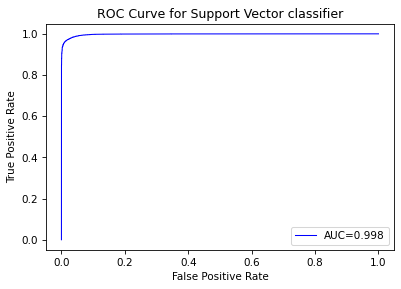

In [462]:
probas = svc.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='b', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for Support Vector classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

KNN

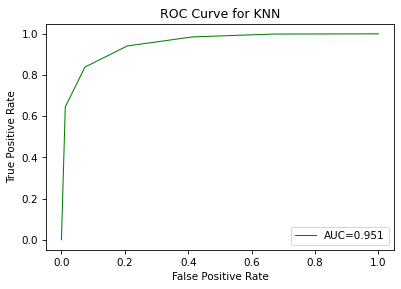

In [463]:
probas = knn.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='g', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Logistic Regression

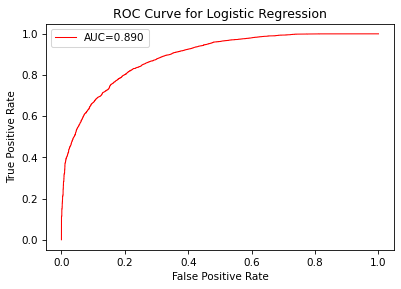

In [464]:
probas = log.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='r', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Decision Tree Classifier

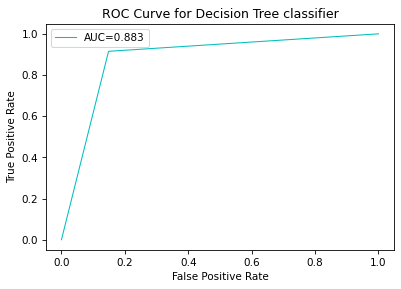

In [465]:
probas = dtc.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='c', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for Decision Tree classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Random Forest Classifier

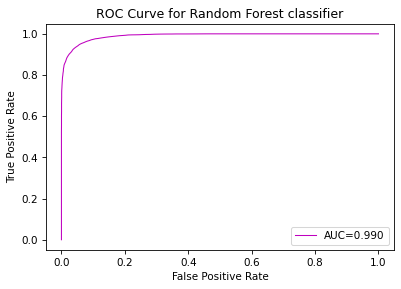

In [466]:
probas = rfc.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='m', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for Random Forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

XGBoost Classifier

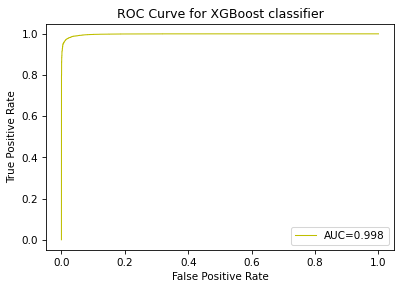

In [467]:
probas = xgbc.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_curve = auc(fpr, tpr)

plt.figure(dpi=75)
plt.plot(fpr, tpr, lw=1, color='y', label=f'AUC={roc_curve:.3f}')
plt.title('ROC Curve for XGBoost classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

# AUC-PR for Classification

In [454]:
from sklearn.metrics import precision_recall_curve, average_precision_score,auc

SVC

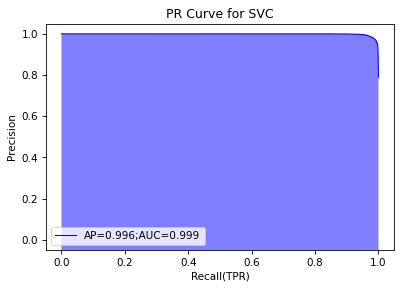

In [455]:
probas = svc.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='b',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='b',alpha=0.5)
plt.title('PR Curve for SVC')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

KNN

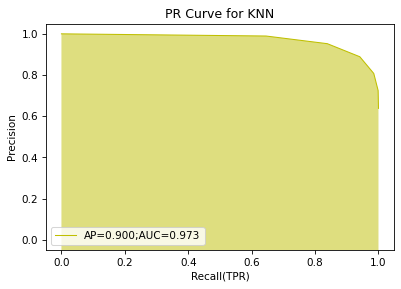

In [456]:
probas = knn.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='y',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
plt.title('PR Curve for KNN')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Logistic Regression

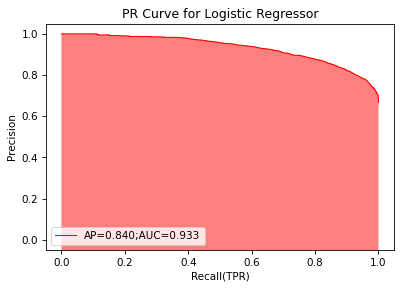

In [457]:
probas = log.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='r',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='r',alpha=0.5)
plt.title('PR Curve for Logistic Regressor')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Decision Tree Classifier

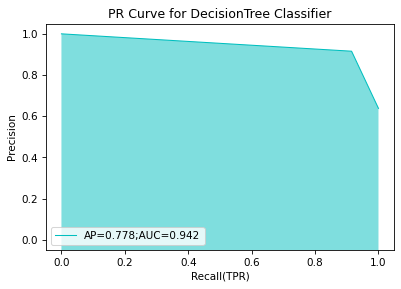

In [458]:
probas = dtc.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='c',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='c',alpha=0.5)
plt.title('PR Curve for DecisionTree Classifier')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

Random Forest Classifier

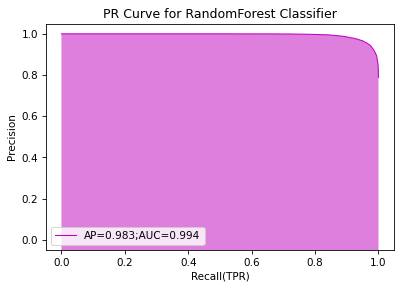

In [459]:
probas = rfc.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='m',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='m',alpha=0.5)
plt.title('PR Curve for RandomForest Classifier')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

XGBoost Classifier

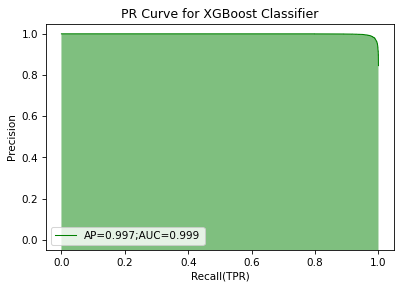

In [460]:
probas = xgbc.predict_proba(x_test)
precision,recall,thresholds=precision_recall_curve(y_test,probas[:,0],pos_label=0)
avg_precision=average_precision_score(y_test,probas[:,1])
pr_auc=auc(recall,precision)
plt.figure(dpi=75)
plt.plot(recall,precision,lw=1,color='g',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
plt.fill_between(recall,precision,-1,facecolor='g',alpha=0.5)
plt.title('PR Curve for XGBoost Classifier')
plt.xlabel('Recall(TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()